# Correlation between shape descriptors

In [1]:
import os
import os.path as osp
import numpy as np

import argus_shapes as shapes

%matplotlib inline
import matplotlib.pyplot as plt

/home/mbeyeler/anaconda3/lib/python3.5/site-packages/skvideo/__init__.py:356: UserWarning: avconv/avprobe not found in path: 
  warnings.warn("avconv/avprobe not found in path: " + str(path), UserWarning)
2019-05-08 11:13:18,032 [pulse2percept] [INFO] Welcome to pulse2percept


In [2]:
# Assumes all data live in a directory ${DATA_ROOT}/argus_shapes, where DATA_ROOT is
# an environment variable. See README.md on GitHub.
# If no such environment variable exists, data will be automatically downloaded from
# OSF and stored in '../data/argus_shapes'
rootfolder = os.environ['DATA_ROOT'] if 'DATA_ROOT' in os.environ else osp.join('..', 'data')
datafolder = osp.join(rootfolder, 'argus_shapes')

In [3]:
# Load subject data:
subjectdata = shapes.load_subjects(osp.join(datafolder, 'subjects.csv'))
# A scaling factor is used when showing the drawings for the sake of visibility:
subjects = subjectdata.index.sort_values()

In [4]:
# Load drawings:
Xy = shapes.load_data(osp.join(datafolder, 'drawings_single.csv'))

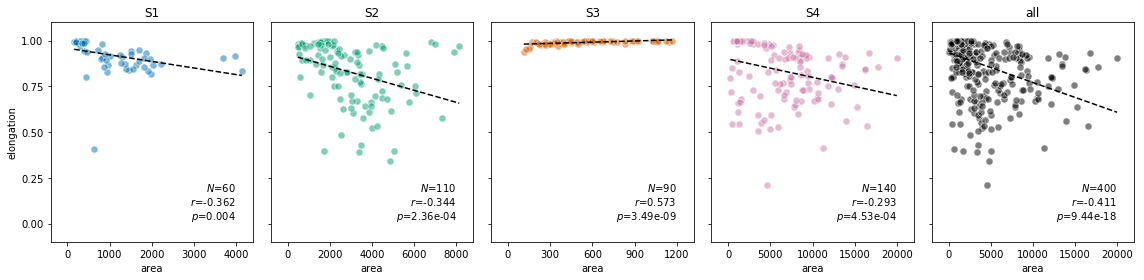

In [5]:
yticks = np.linspace(0, 1, 5)
xmaxs = [4000, 8000, 1200, 20000, 20000]
colors = ['#0072B2', '#009E73', '#D55E00', '#CC79A7']
fig, axes = plt.subplots(ncols=len(subjects) + 1, figsize=(16, 4), sharey=True)
for ax, subject, color, xmax in zip(axes, list(subjects) + ['all'], colors + ['k'], xmaxs):
    xticks = np.linspace(0, xmax, 5)
    if subject == 'all':
        shapes.viz.scatter_correlation(Xy.area, Xy.eccentricity, ax,
                                       textloc='bottom right', color=color,
                                       xticks=xticks, yticks=yticks)
    else:
        shapes.viz.scatter_correlation(Xy[Xy.subject == subject].area,
                                       Xy[Xy.subject == subject].eccentricity,
                                       ax,
                                       textloc='bottom right', color=color,
                                       xticks=xticks, yticks=yticks)
    ax.set_title(subject)
    ax.set_xlabel('area')
axes[0].set_ylabel('elongation')
fig.tight_layout()
fig.savefig('figS4-area-vs-elongation.pdf', transparent=True)